# **Teoría Moderna de la Detección y Estimación**
## **Clasificación máquina (Sesión II)**
### **Curso académico: 2024/2025**

*   Grado en Ingeniería de Sonido e Imagen (Grupo 66)
*   Grado en Ingeniería de Tecnologías de Telecomunicación (Grupos 91 y 92)

Departamento de Teoría de la Señal y Comunicaciones

#### Importación de librerías

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection


# **1. Calidad de las clasificaciones**




## **1.1 Falsos positivos, falsos negativos...**

En un problema de clasificación binaria, el resultado del clasificador se puede categorizar en $4$ grupos:
*   **True Positive** (verdaderos positivos): aquellas muestras cuya etiqueta real es la clase positiva, y la clase predicha, también es la positiva.

  TP: número de verdaderos positivos

*   **False Positive** (falsos positivos): aquellas muestras cuya etiqueta real es la clase negativa, pero la clase predicha, es la positiva.

  FP: número de falsos positivos

*   **True Negative** (verdaderos negativos): aquellas muestras cuya etiqueta real es la clase negativa, y la clase predicha, también es la negativa.

  TN: número de verdaderos negativos

*   **False Negative** (falsos negativos): aquellas muestras cuya etiqueta real es la clase positiva, pero la clase predicha, es la negativa.

  FN: número de falsos negativos

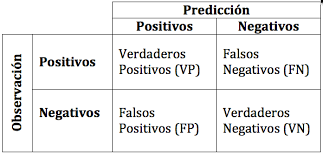

(En el dibujo, VP representa TP mientras que VN representa TN).

## **1.2 Relación con falsa alarma y detección**

1.   Probabilidad de falsa alarma ($P_{\text{FA}}$)

  $ P_{\text{FA}} \approx \displaystyle \frac{\text{FP}}{\text{FP}+\text{TN}}$


2.   Probabilidad de pérdida ($P_{\text{M}}$)

  $ P_{\text{M}} \approx \displaystyle \frac{\text{FN}}{\text{FN}+\text{TP}}$


3. Probabilidad de detección ($P_{\text{D}}$)

  $ P_{\text{D}} \approx \displaystyle \frac{\text{TP}}{\text{TP}+\text{FN}}$



## **1.3 Matriz de confusión**

### **1.3.1 Clasificación binaria**
\begin{equation}
M = \begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP}
\end{bmatrix}
\end{equation}

### **1.3.2 Clasificación multiclase**
*   Cada elemento $M[i,j]$ contiene el número de muestras cuya clase correcta es $C_i$, pero han sido etiquetados como clase $C_j$ por el clasificador.
*   Los elementos de la diagonal indican los aciertos del clasificador, mientras que los elementos de la no-diagonal indican los errores de clasificación.

# **2. Clasificador lineal**

## **2.1 Función discriminante lineal**

$$g(\mathbf{x}) = w_0+\mathbf{w}^{\text{T}}\mathbf{x}\begin{array}{c} D=1 \\ \gtrless \\ D=0 \end{array} 0 $$



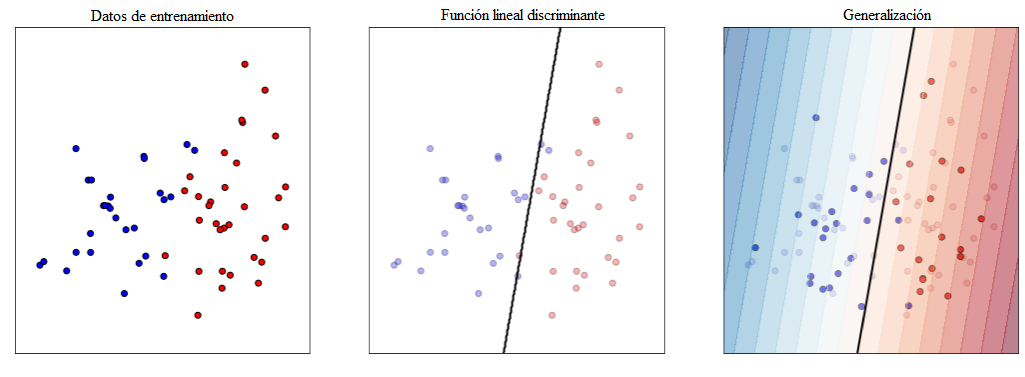

## **2.2 Motivaciones para un clasificador lineal**
*   Los problemas se definen, generalmente, en términos de una colección de datos, y no de verosimilitudes o probabilidades *a priori* de las hipótesis.
*   Algunas veces, sí que se dispone de las funciones de densidad de probabilidad, pero éstas se pueden volver intratables o muy difíciles de manejar.
*   Ventajas de la clasificación lineal:
  1.   Fácil de implementar.
  2.   Operación rápida.
  3.   Situación óptima para verosimilitudes que son Gaussianas con matrices de varianza-covarianza idénticas (situación muy común en aplicaciones del mundo real).








## **2.3 Notación compacta**

*   **Definición de las etiquetas**

  $y_i = \left\{
  \begin{array}{rcl}
      +1 & \text{si} \,\, \mathbf{x}_i \in H_1\\
      -1 & \text{si} \,\, \mathbf{x}_i \in H_0
  \end{array}
  \right.$
*   Función discriminante lineal

$$g(\mathbf{x}) = w_0+\mathbf{w}^{\text{T}}\mathbf{x}\begin{array}{c} D=1 \\ \gtrless \\ D=0 \end{array} 0 \rightarrow \text{sign}\big(g(\mathbf{x})\big) =\text{sign}\big(w_0+\mathbf{w}^{\text{T}}\mathbf{x}\big)  $$

*   Notación compacta


  $\mathbf{w}_e = \left[\begin{array}{c}
  w_0\\
  \mathbf{w}
  \end{array}\right]$; $\mathbf{x}_e = \left[\begin{array}{c}
  1\\
  \mathbf{x}
  \end{array}\right]$

  Por tanto,
  
  $g(\mathbf{x}) = \text{sign}\big(\mathbf{w}_e^{\text{T}} \mathbf{x}_e \big)$

## **2.4 Funciones de pérdida**

*   Los modelos de aprendizaje máquina se basan en la optimización de una función de pérdida que
intenta minimizar los errores de predicción en el conjunto de entrenamiento.
*  La función de pérdida **natural** en este escenario es la **función de pérdida $0$-$1$**, que básicamente cuenta el número de errores en la clasificación.

*   Sin embargo, la **función de pérdida $0$-$1$** no conduce a una optimización sencilla, ya que es discontinua, y en consecuencia, no diferenciable.

*   Por lo tanto, la **función de pérdida $0$-$1$** debe ser reemplazada por diferentes funciones de pérdida que ofrecen ventajas computacionales, dando lugar a los algoritmos que se estudiarán en esta sesión.

(En el siguiente enlace puedes encontrar más información acerca de las funciones de pérdida y, en particular, de la [función de pérdida $0$-$1$](https://www.baeldung.com/cs/ai-0-1-loss-function)).

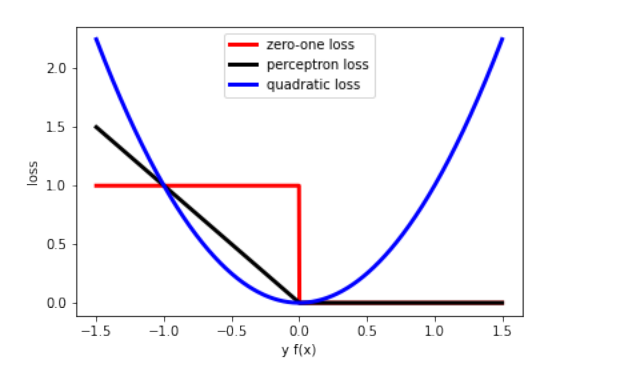

# **3. Regresión logística**

## **3.1   Introducción**




La regresión logística, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria (variable objetivo en este curso o *target* $-$$Y$) en función de una o más variables cuantitativas (observación o vector de observaciones en este curso, $-$ $X$ o $\mathbf{X}$).

Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en una clase u otra dependiendo del valor que tome la variable empleada como predictor (observación). Por ejemplo, clasificar a un individuo desconocido como hombre o mujer en función del tamaño de su mandíbula.

Se llama $\text{regresión logística simple}$ cuando solo hay una variable independiente u observación $\big(X\big)$ y $\text{regresión logística multivariante}$ cuando hay más de una variable de observación $\big(\mathbf{X}$ es un vector$\big)$. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o *features*.

## **3.2 ¿Por qué un regresor logístico y no un regresor lineal?**

Sea $Y$ una variable con dos posibles valores, que se codifican como $1$ y $0$. Matemáticamente es posible ajustar un regresor lineal 1D cuya expresión sería: $Y=w_0+w_1X$. El problema de esta aproximación es que, al tratarse de una recta, para valores elevados de la variable de observación ($X=x$), se obtienen valores de $y$ menores que $0$ o mayores que $1$, lo que entra en contradicción con el hecho de que las probabilidades siempre están dentro del rango $[0,1]$.


**Ejemplo:** clasificación del cancer de mama de Winconsin en benigno o maligno.

In [13]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)


In [14]:
print(y.shape)

(569,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [17]:
#Regresor LINEAL
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_s, y_train)
y_pred = reg.predict(X_test_s)
y_pred_max = np.round(np.max(y_pred),2)
y_pred_min = np.round(np.min(y_pred),2)
print('Valor máximo:', y_pred_max)
print('Valor mínimo:', y_pred_min)

Valor máximo: 1.74
Valor mínimo: -0.71


In [18]:
#Regresor LOGÍSTICO
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(X_train_s,y_train)
y_pred_log = reg_log.predict(X_test_s)
y_pred_log_max = np.round(np.max(y_pred_log),2)
y_pred_log_min = np.round(np.min(y_pred_log),2)
print('Valor máximo:', y_pred_log_max)
print('Valor mínimo:', y_pred_log_min)

Valor máximo: 1
Valor mínimo: 0


Para evitar este tipo de problemas, la **regresión logística transforma el valor devuelto por la regresión lineal** ($w_0 +\mathbf{w}^{\intercal}\mathbf{X}$) **empleando una función cuyo resultado está siempre comprendido entre 0 y 1**. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

Función sigmoide o logística:

$$\boxed{f(z)=\frac{1}{1+\exp(-z)}}$$

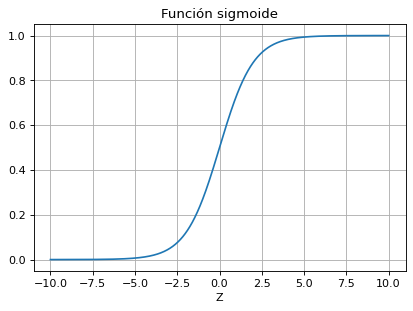

In [19]:
# Función sigmoide
z=np.linspace(-10,10,1000)
y = 1/(1+np.exp(-z))
# Dibujamos la función
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(z,y)
plt.xlabel('Z')
plt.title('Función sigmoide')
plt.grid()
plt.show()

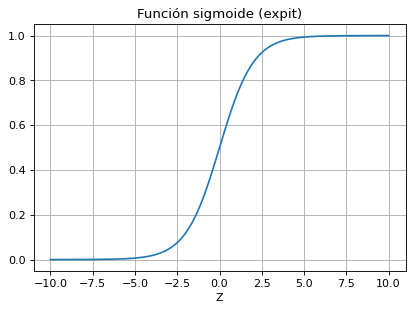

In [20]:
#Función sigmoide implementada en Python
from scipy.special import expit
y_expit = expit(z)
# Dibujamos la función
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(z,y_expit)
plt.xlabel('Z')
plt.title('Función sigmoide (expit)')
plt.grid()
plt.show()

Para valores de $Z$ muy grandes positivos, el valor de $\exp(-z)$ es aproximadamente $0$ por lo que el valor de la función sigmoide es $1$. Para valores de $Z$ muy grandes negativos, el valor $\exp(-z)$ tiende a infinito por lo que el valor de la función sigmoide es $0$.

**¿Cuál es el valor de la probabilidad $P(Y=1|X=x)$?**
(Por simplicidad, suponemos caso 1D).

$\begin{align*}
P(Y=1|X=x) & =\frac{1}{1+e^{-(w_0+w_1x)}}\\
& = \frac{1}{\frac{e^{(w_0+w_1x)}}{e^{(w_0+w_1x)}} + \frac{1}{e^{(w_0+w_1x)}} }\\
& = \frac{1}{\frac{1 + e^{(w_0+w_1x)} }{e^{(w_0+w_1x)}}}\\
&= \frac{e^{(w_0+w_1x)}}{1 + e^{(w_0+w_1x)}} = p
\end{align*}$

donde $P(Y=1|X=x)$ puede interpretarse como la probabilidad de que la variable $Y$ adquiera el valor $1$, dado que la variable de observación tiene el valor $X=x$. Un valor cercano a $0$ significa que es muy improbable que $Y$
 haya ocurrido, y un valor cercano a $1$ significa que es muy probable que tuviese lugar.

Por tanto, el objetivo de la regresión logística no es, como en regresión lineal, predecir el valor de la variable $Y$
 a partir de una o varias variables predictoras ($X=x$ o $\mathbf{X} = \mathbf{x}$), sino que se desea predecir la probabilidad de que ocurra $Y$ conocidos los valores de $X$ o $\mathbf{X}$.



Esta función, puede ajustarse de forma sencilla con métodos de regresión lineal si se emplea su versión logarítmica, obteniendo lo que se conoce como LOG of ODDs:

$$  
\text{logit}(p) = \ln \bigg(\frac{p}{1-p}\bigg)=\ln\Bigg( \frac{P(Y|X=x)}{1-P(Y|X=x)}\Bigg) = \ln\Big(e^{+(w_0+w_1x)}\Big)= w_0 +w_1x
$$


## **3.3   Concepto de ODDS o razón de probabilidad y logaritmo de ODDS**


En la regresión lineal simple, se modela el valor de la variable $Y$ en función del valor de la variable de observación $X$. Sin embargo, en la regresión logística, tal como se ha descrito anteriormente, se modela la probabilidad de que la variable $Y$ pertenezca a la clase $+1$ en función del valor que adquieran las observaciones, mediante el uso de *LOG of ODDs* (por ejemplo, el logaritmo de la razón de proporciones de enfermar, de fallecer, de éxito, etc.).
Las probabilidades logarítmicas juegan un papel central en la regresión logística. Cada probabilidad se puede convertir fácilmente en probabilidades logarítmicas, calculando la relación $-$*ratio*$-$ de probabilidades y tomando el logaritmo.


Suponed que la probabilidad de que llueva hoy es de $0.8$, por lo que la probabilidad de que no llueva (evento falso) es de $1 - 0.8 = 0.2$. Los **ODDs** o **razón de probabilidad** de verdadero se definen como el *ratio* (cociente) entre la probabilidad de evento verdadero y la probabilidad de evento falso $\frac{p}{q} = \frac{p}{1-p}$. En este caso los ODDs de verdadero son $\frac{0.8}{0.2} = 4$ (esto es lo que se conoce como "*ODD ratio*"), lo que equivale a decir que se esperan 4 eventos verdaderos por cada evento falso. *LOG of ODDs* es el logaritmo de las ODDs, es decir, en este caso, $\ln(4) \approx 1.3862$.

La transformación de probabilidades a ODDs es monotónica, es decir, si la probabilidad aumenta también lo hacen los ODDs, y viceversa. El rango de valores que pueden tomar los ODDs es de $[-\infty,\infty]$. Dado que el valor de una probabilidad está acotado entre $[0,1]$ se recurre a una trasformación `logit` (existen otras) que consiste en el logaritmo natural de los ODDs. Esto permite convertir el rango de probabilidad previamente limitado a $[0,1]$ a $(-\infty,\infty)$.

Algunos ejemplos más son...

$\mathbf{p}	\qquad \qquad       \mathbf{odds} \qquad	\quad   \mathbf{Log(odds)}$

$\ldots	\qquad \qquad       \ldots \qquad	\quad   \ldots $

$0.001 \quad \,\,\,  0.001001	\qquad -6.906755$

$0.01	\qquad 0.010101	\qquad -4.59512$

$0.2\qquad \qquad	0.25 \qquad	-1.386294$

$0.3 \qquad	0.4285714 \qquad -0.84729$

$0.5 \qquad	\qquad \quad 1	\qquad \qquad \quad 0$

$0.9999\qquad	\quad 9999 \qquad \quad	9.21024$

$\ldots	\qquad \qquad       \ldots \qquad	\quad   \ldots $

Los ODDs y el logaritmo de ODDs cumplen que:

*   Si $p(\text{verdadero}) = p(\text{falso})$, entonces odds(verdadero) = 1
*   Si $p(\text{verdadero}) < p(\text{falso})$, entonces odds(verdadero) <  1
*   Si $p(\text{verdadero}) > p(\text{falso})$, entonces odds(verdadero) >  1

A diferencia de la probabilidad que no puede exceder el 1, los ODDs no tienen límite superior.
*   Si odds(verdadero) = 1, entonces $\text{logit}(p) = 0$
*   Si odds(verdadero) < 1, entonces $\text{logit}(p) < 0$
*   Si odds(verdadero) > 1, entonces $\text{logit}(p) > 0$

La transformación `logit` no existe para $p = 0$. La transformación `logit` requiere que $p$ esté estrictamente entre $0$ y $1$, es decir, $p \in (0,1)$. Esto se debe a que:



*   Si $p=0$, el logaritmo no está definido.
*   Si $p=1$, el denominador $1-p$ sería $0$, lo que generaría una división por cero.






## **3.4    Ajuste del modelo**

Una vez obtenida la relación lineal entre el logaritmo de los ODDs y la variable de observación $X$:

 $$\text{log}\Big(\frac{p}{1-p}\Big)=w_0+w_1X$$

se tienen que estimar los parámetros $w_0$ y $w_1$ (caso 1D) a partir de los datos de entrenamiento.


Mientras que en regresión lineal los coeficientes del modelo se estiman por mínimos cuadrados, en regresión logística se utiliza el método del máxima verosimilitud (*maximum-likelihood*): se buscan coeficientes tales que la probabilidad prevista $\widehat{p}(x_i)$ de éxito se aproxime lo máximo posible a los valores observados.

Este método está ampliamente extendido en la estadística aunque su implementación no siempre es trivial. Los valores de $w_0$ y $w_1$ se pueden hallar empleando el método de Newton o el de descenso por gradiente, siendo la función de coste:

$$J(\mathbf{w_\text{e}}) = P(\mathbf{y}|\mathbf{w_\text{e}}) =\prod_{i=1}^{N}P(y_i|\mathbf{w_\text{e}}) = \Bigg(\frac{1}{1+\exp(-\mathbf{w_\text{e}}^\top\mathbf{x})} \Bigg)^{y_i}\Bigg(1- \frac{1}{1+\exp(-\mathbf{w_\text{e}}^\top\mathbf{x})} \Bigg)^{1-y_i} $$

(se multiplica las probabilidades de todos las muestras, asumiendo que las observaciones son independientes).

Si se toma logaritmo neperiano, se obtiene la log-verosimilitud:

$$J(\mathbf{w}) = \log P(\mathbf{y}|\mathbf{w_\text{e}}) =\sum_{i=1}^{N} y_i \text{log} \big(f(\mathbf{x}_i,\mathbf{w_\text{e}})\big)+  (1-y_i) \text{log} \big(1-f(\mathbf{x}_i,\mathbf{w_\text{e}})\big)$$

y los valores óptimos de los pesos son aquellos que maximizan dicha función:

$$\mathbf{w_\text{e}}^{\ast} = \arg \max_{w_0,\mathbf{w}} \,\,\log P(\mathbf{y}|\mathbf{w_\text{e}}) $$


Si bien éste no es el método de optimización más adecuado para resolver la regresión logística, está muy extendido en el ámbito del aprendizaje máquina o automático para ajustar otros modelos.

$\underline{\text{Nota}}$: en `scikit-learn`, el modelo de regresión logística, utiliza por defecto, el método de optimización `lbfgs` (modelo de optimización quasi-Newton, con gran cantidad de parámetros o de una gran complejidad).
Ver parámetro `solver`, de la función [`LogisticRegression`.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


**Diferencias entre LBFGS y el gradiente descendente**:



1.   Cálculo de la tasa de aprendizaje (learning rate):
    *   En el gradiente descendente estándar, el valor de la tasa de aprendizaje ($\eta$) debe ajustarse manualmente o mediante un esquema de programación adaptativa.
    *   En LBFGS, el valor de la tasa de aprendizaje se calcula automáticamente utilizando información de iteraciones previas, lo que evita depender de un hiperparámetro explícito $\eta$.


2.  Uso de la matriz Hessiana:
    *   El gradiente descendente solo utiliza información del gradiente (primera derivada).
    *   LBFGS utiliza una aproximación de la matriz Hessiana para acelerar la convergencia. Esto lo hace más eficiente en problemas convexos como la regresión logística.

   **Nota**: la matriz Hessiana es una matriz cuadrada que contiene las segundas derivadas parciales de una función escalar $f(\mathbf{x})$ con respecto a todas las variables.

3.  Convergencia:
    *   LBFGS típicamente converge más rápido que el gradiente descendente, especialmente en problemas donde las características tienen diferentes escalas o curvaturas. Esto lo hace una opción preferida en bibliotecas como `scikit-learn`, donde la optimización debe ser robusta y eficiente.

4.  Convergencia:
    *   El gradiente descendente estándar no requiere almacenar iteraciones previas.
    *   LBFGS almacena un número limitado de iteraciones previas para aproximar la matriz Hessiana, lo que requiere más memoria, aunque sigue siendo limitado.


## **3.5   Interpretación del modelo**

A diferencia de la regresión lineal, en la que $w_1$ se corresponde con el cambio promedio en la variable $Y$ debido al incremento en una unidad de la variable de observación $X$, en regresión logística, $w_1$ indica el cambio en el logaritmo de ODDs debido al incremento de una unidad de $X$, o lo que es lo mismo, multiplica los ODDs por $e^{w_1}$. Dado que la relación entre $P(Y)$ y $X$ no es lineal, $w_1$ no se corresponde con el cambio en la probabilidad de $Y$ asociada con el incremento de una unidad de $X$. Cuánto se incremente la probabilidad de $Y$ por unidad de $X$ depende del valor de $X$, es decir, de la posición en la curva logística en la que se encuentre.

## **3.6   Condiciones**

*   **Independencia**: las observaciones tienen que ser independientes unas de otras.
*   **Relación lineal entre el logaritmo natural de odds y la variable continua**: patrones en forma de U son una clara violación de esta condición.
*   La **regresión logística no precisa de una distribución normal** de la variable de observación.
*   **Número de observaciones**: no existe una norma establecida al respecto, pero se recomienda entre $50$ a $100$ observaciones.

## **3.7   ¿Cómo realizar una predicción?**

Una vez estimados los coeficientes del modelo logístico, es posible conocer la probabilidad de que la variable $Y$ pertenezca al nivel de referencia, dado un determinado valor de la variable de observación. Para ello se emplea la ecuación del modelo:

$$
\widehat{P}(Y=1|X) = \frac{e^{(\widehat{w}_0+\widehat{w}_1X)}}{1 + e^{(\widehat{w}_0+\widehat{w}_1X)}}
$$

donde el valor $e^{(\widehat{w}_0+\widehat{w}_1X)}$ es el log(ODDs) devuelto por el modelo.

Como es sabido,

$$
\widehat{P}(Y=0|X) = 1-\widehat{P}(Y=1|X)
$$

## **3.7   Convertir probabilidad en clasificación**

Una de las principales aplicaciones de un modelo de regresión logística es clasificar la variable $Y$ en función del valor que tome $X$. Para conseguir esta clasificación, es necesario establecer un umbral de probabilidad a partir de la cual se considera que la variable pertenece a uno de los niveles. Por ejemplo, se puede asignar una observación a la clase $1$ si $\widehat{P}(Y=1|X)>0.5$ y a la clase $0$ si de lo contrario.

## **3.8   Regresión logística usando `scikit-learn`**

A continuación, implementaremos el algoritmo de regresión logística en Python. Para ello, construiremos un modelo que estima la probabilidad de admisión de un estudiante basada en las notas de dos exámenes.



#### Carga de datos

In [21]:
Data = pd.read_csv('admission_basedon_exam_scores.csv')

In [22]:
display(Data)

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


El archivo contiene tres columnas: notas del examen 1 (sobre 100 puntos), notas del examen 2 (sobre 100 puntos) y estado de admisión (si ha sido admitido o no).

#### Obtención de la matriz de datos (X) y sus etiquetas (y)

In [23]:
X_all = Data.loc[:,Data.columns[0:2]].values
y_all = Data.loc[:,Data.columns[-1]].values

In [24]:
print('Número de observaciones:', X_all.shape[0])
print('Número de características ', X_all.shape[1])
print('Número de clases :', len(np.unique(y_all)))

Número de observaciones: 100
Número de características  2
Número de clases : 2


#### Visualización de los datos

Para pintar los datos de los solicitantes, en primer lugar, hay que separar los datos en dos grupos (admitidos / no admitidos)

In [25]:
X_admitidos   = X_all[y_all==1,:]
X_noadmitidos = X_all[y_all==0,:]

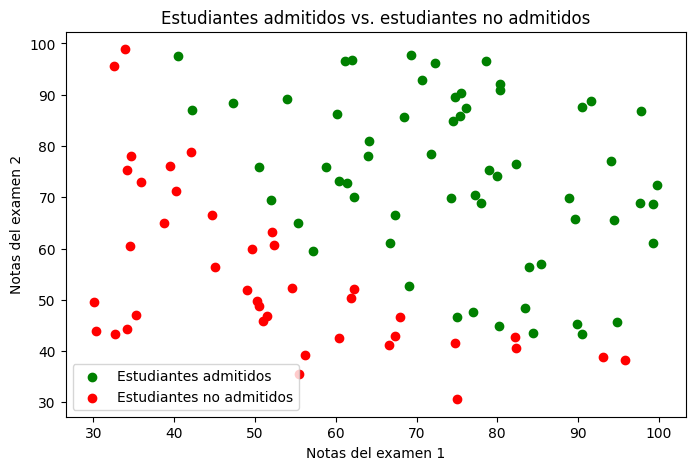

In [26]:
plt.figure(figsize = (8,5))
plt.scatter(X_admitidos[:,0], X_admitidos[:,1], color='green', label='Estudiantes admitidos')
plt.scatter(X_noadmitidos[:,0], X_noadmitidos[:,1], color='red', label='Estudiantes no admitidos')
plt.xlabel('Notas del examen 1')
plt.ylabel('Notas del examen 2')
plt.legend()
plt.title('Estudiantes admitidos vs. estudiantes no admitidos')
plt.show()

Problema no linealmente separable!!

In [27]:
print('Número de estudiantes admitidos:', X_admitidos.shape[0])
print('Número de estudiantes no admitidos:', X_noadmitidos.shape[0])

Número de estudiantes admitidos: 60
Número de estudiantes no admitidos: 40


Dividimos el conjunto de datos, de modo que se pueda usar un conjunto de datos para entrenar el modelo y un conjunto para evaluar cómo de bueno o malo es el modelo.
Mantenemos el 70% de los datos para entrenar el modelo y el 30% restante para la evaluación del mismo.


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state = 42)

In [29]:
print('Número de muestras de entrenamiento =', X_train.shape[0])
print('Número de muestras de test =', X_test.shape[0])
print('Número de clases :', len(np.unique(y_train)))

Número de muestras de entrenamiento = 70
Número de muestras de test = 30
Número de clases : 2


#### Regresión logística (con `scikit-learn`)

In [30]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
# Training the model using training data
logreg.fit(X_train, y_train)

LogisticRegression()

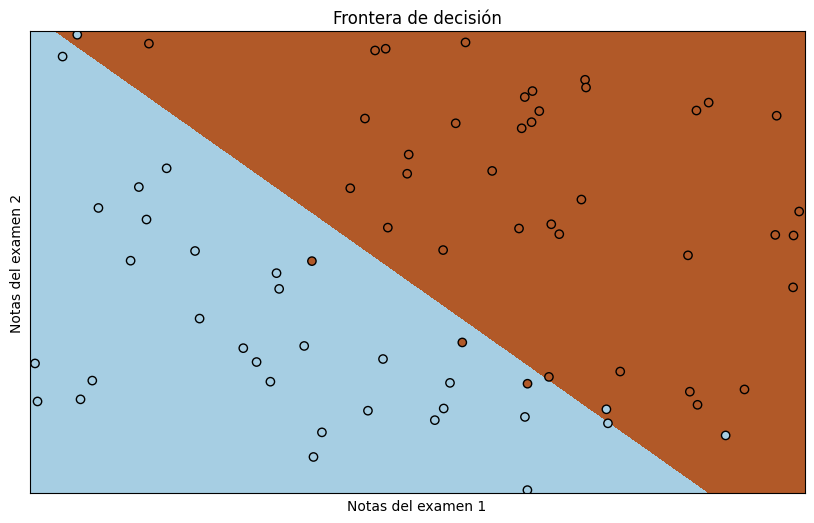

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Notas del examen 1')
plt.ylabel('Notas del examen 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title("Frontera de decisión")
plt.show()

¿Cuál es la probabilidad de acierto del modelo sobre el conjunto de test?

In [32]:
score_test = np.round(logreg.score(X_test, y_test),2)
print('Model Score= ', score_test)

Model Score=  0.83


Curva ROC y matriz de confusión

In [33]:
from sklearn.metrics import roc_curve, auc
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_LR = auc(fpr_LR, tpr_LR)

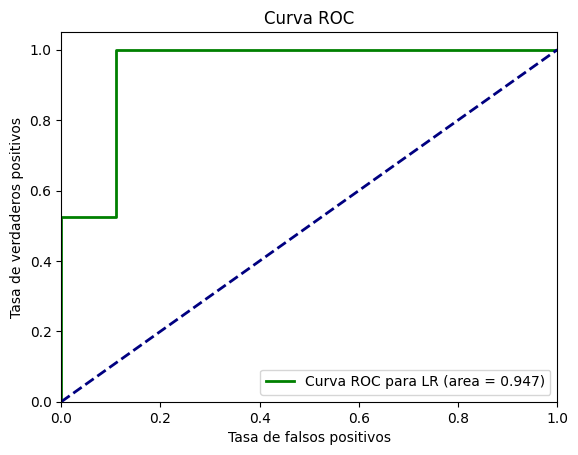

In [34]:
plt.figure()
plt.plot(fpr_LR, tpr_LR, color="green", lw=2, label="Curva ROC para LR (area = %0.3f)" % roc_auc_LR)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logreg.predict(X_test))

array([[ 8,  1],
       [ 4, 17]])

<font color = 'blue'> ¿Cómo calcularíais probabilidad de detección y probabilidad de falsa alarma a partir de la matriz anterior?

# **4. Análsis Discriminante Lineal**

## **4.1. Introducción**

El **Análisis Discriminante Lineal **(o más conocido como LDA, por sus siglas en inglés *Linear Discriminant Analysis*) es una **extensión** del **discriminante lineal de Fisher**.

Permite **encontrar una combinación lineal de las características** que separan dos o más clases. La combinación resultante puede ser utilizada como un clasificador lineal, o más comúnmente, para reducción de dimensiones antes de una posterior clasificación (paso de pre-procesamiento en aprendizaje máquina y clasificación de muestras).

 El **objetivo de LDA** es **proyectar las características**, originalmente pertenecientes a un espacio dimensional superior, en un **espacio de dimensión inferior** con una **mejor separabilidad de clases** para así evitar el sobreajuste (*maldición de la dimensionalidad*) y también reducir recursos y costes computacionales.


---
La técnica original fue desarrollada en el año 1936 por Ronald A. Fisher y se denominó "Discriminante Lineal" o "Análisis Discriminante de Fisher" ([The Use of Multiple Measurements in Taxonomic Problems](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x)). Originalmente, fue desarrollado como una técnica de separación de $2$ clases. La versión multiclase (más de $2$ clases) fue generalizada posteriormente por C. R. Rao en 1948 y se denominó "Análisis Discriminante Múltiple" ([The utilization of multiple measurements in problems of biological classification](https://www.jstor.org/stable/2983775)). Hoy en día, todos estos métodos se conocen como "Análisis Discriminante Lineal" (o simplemente, LDA).

---


En pocas palabras, el objetivo principal de LDA es proyectar un espacio de características ($d$-dimensional) en otro de dimensión menor $k$ (donde $k\leq d-1$) manteniendo la información discriminatoria entre clases.




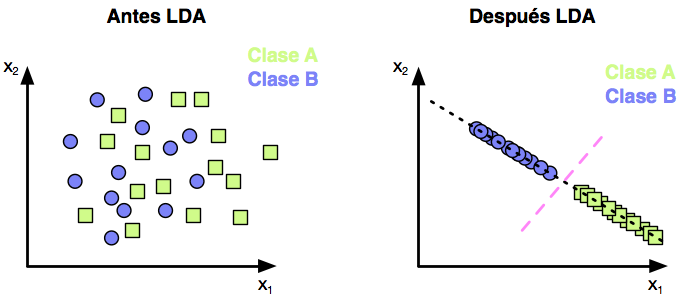


(En este ejemplo, $d=2$ y $k=1$)

**Proyecciones**

Combinación lineal de los elementos del vector $\mathbf{x}_i$

$$z_i = \mathbf{w}^{\intercal}\mathbf{x}_i \quad \forall\, i$$

donde $\mathbf{w}$ es un vector de proyecciones que pasa por el origen. La dirección de $\mathbf{w}$ es importante (y no tanto su magnitud).

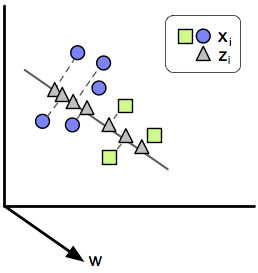

$z_i$ es la proyección ortogonal de su correspondiente
$\mathbf{x}_i$ sobre una recta con la misma dirección de $\mathbf{w}$.


A continuación, se muestra el **efecto de variar la dirección** de $\mathbf{w}$: a la izquierda se obtiene una mala separación entre las clases proyectadas, mientras que a la derecha se obtiene una separación óptima entre las clases proyectadas. **Optimizar la proyección** significa que se debe encontrar el **vector** $\mathbf{w}$ que **maximice la separación entre las clases proyectadas**.

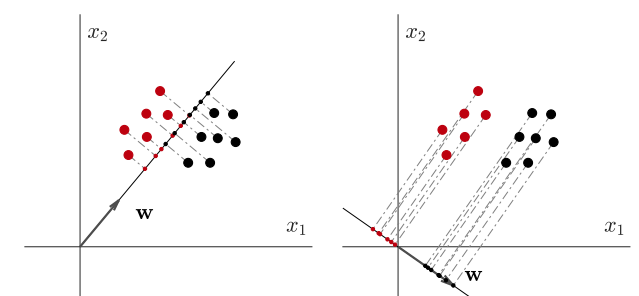

$\underline{\text{Nota}}$: El enfoque general de LDA es muy similar al de Análisis de Componentes Principales (PCA), pero además de encontrar los ejes de componentes que minimizan la varianza de los datos para la misma clase (PCA y LDA), LDA también encuentra los ejes que maximizan la separación de los datos entre múltiples clases.

**Aplicaciones de LDA**

Se utiliza ampliamante en áreas del aprendizaje máquina como el reconocimiento de imágenes u objetos o en el análisis predictivo para *marketing* (ayuda a profesionales del *marketing* a entender y anticiparse a los comportamientos y deseos de los consumidores).


## **4.2 ¿Qué es la reducción de dimensionalidad?**

Las técnicas de reducción de dimensionalidad son de gran utilidad en aplicaciones del aprendizaje máquina, *data mining*, bioinformática o recuperación del información (en inglés, *information retrieval*).  
El objetivo principal es eliminar aquellas características que puedan resultar redundandes o ser dependientes, de manera que el número de características del conjunto de datos se reduzca a un número inferior (¡sin perder información!).

Los datos multidimensionales pueden contener características que tienen una alta correlación entre sí, que se pueden transformar en datos con sólo $2$ ó $3$ características (empleando técnicas de reducción de dimensionalidad).


## **4.3 Limitaciones de la regresión logística**

Como se ha demostrado, la regresión logística es un algoritmo de clasificación lineal simple y potente. Sin embargo, tiene algunas desventajas que han llevado al diseño de algoritmos de clasificación alternativos como LDA.

Algunas de las limitaciones de la regresión logística son las siguientes:

*   **Problemas de dos clases**: la regresión logística se utiliza tradicionalmente para problemas de clasificación binaria ($2$ clases). Sin embargo, puede generalizarse a problemas multiclase mediante técnicas como One-vs-Rest (OvR) o Softmax. LDA también es una opción para clasificación multiclase, aunque su rendimiento depende de las suposiciones sobre las distribuciones de las clases.

*   **Inestable con clases bien separadas**: la regresión logística puede volverse inestable en casos de separación perfecta entre clases, ya que los coeficientes del modelo tienden al infinito. Este problema puede mitigarse con regularización.

*   **Inestable con pocos datos**: cuando se dispone de pocos datos, la regresión logística puede ser menos estable debido a la dificultad para estimar parámetros confiables. En estos casos, LDA puede ser más robusto, ya que aprovecha suposiciones como la normalidad de las distribuciones para estimar parámetros incluso con menos datos

## **4.4 ¿Cómo trabaja LDA?**

LDA realiza las siguientes suposiciones principales sobre los datos:

*   Los **datos** dentro de cada clase siguen una **distribución normal multivariante**.
*   Las **características** son **estadísticamente independientes** o tienen **correlaciones moderadas**.
*   Las **matrices de varianza-covarianza** son **iguales** para **todas las clases**.

Cabe destacar que estas suposiciones solo se aplican al uso de LDA como clasificador. Cuando LDA se utiliza para la reducción de dimensionalidad, puede funcionar razonablemente bien incluso si se violan dichas suposiciones. Además, en tareas de clasificación, LDA demuestra ser robusto frente a desviaciones de estas suposiciones, como se observa en:

*“linear discriminant analysis frequently achieves good performances in the tasks of face and object recognition, even though the assumptions of common covariance matrix among groups and normality are often violated"*

(Duda, et al., 2001)” (Tao Li, et al., 2006).




## **4.5 LDA para dos clases**

*   Sea $z\in \mathbb{R}$ un punto proyectado a partir de una muestra $\mathbf{x}\in \mathbb R^{d}$, que pertenece a la clase $C_i$ siendo $i=1,2$.
*   Vector de medias para la clase $C_i$ con $N_i$ muestras (o elementos) en $\mathbb R^{d}$

$$\mathbf{m}_{i} = \frac{1}{N_i}\sum_{j=1}^{N_i} \mathbf{x}_j $$

*   Valor medio proyectado

$$m_{i} = \mathbf{w}^{\intercal}\mathbf{m}_{i} $$

*   Objetivo: maximizar la distancia entre las medias proyectadas para encontrar el vector de proyecciones óptimo

$$ J(\mathbf{w}) = \bigl(m_1 - m_2 \bigr)^2$$


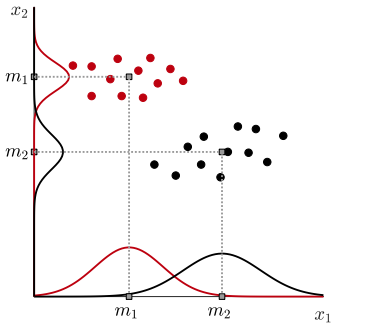

La función de coste $J(\mathbf{w})$ sólo maximiza la **dispersión inter-clase**, de modo que la proyección de los datos se hace sobre los ejes coordenados del espacio de características (eje horizontal). La máxima separación entre $m_1$ y $m_2$ se encuentra en la
proyección sobre el eje $X_1$; sin embargo, las distribuciones proyectadas sobre el eje $X_1$ presentan mayor solape que las proyecciones sobre el eje $X_2$, y sin embargo, tienen una menor distancia inter-clase.



*   **Dispersión intra-clase**: permite encontrar una proyección "rotada" para reducir el solape entre las distribuciones proyectadas.

*   Se reescribe la función de coste:    

$$J(\mathbf{w}) = \frac{(m_1 - m_2)^2}{s_{1}^{2} + s_{2}^{2} } $$

donde $s_i$ es la varianza proyectada de la clase $C_i$:

$$s_{i} = \frac{1}{N_i - 1} \sum_{j=1}^{N_i} (z_j - m_i)^2, \quad i=1,2 $$
*   El vector $\mathbf{w}$ está definido en el espacio original de los datos





*   Varianza de los datos proyectados de la clase $C_i$
$$s_{i}^{2} = \mathbf{w}^{\intercal} S_{i} \mathbf{w} $$

donde

$$S_i = \frac{1}{N_i - 1} \sum_{j=1}^{N_i} (\mathbf{x}_j - \mathbf{m}_i) (\mathbf{x}_j - \mathbf{m}_i)^{\intercal}$$
*   Dispersión intra-clase en el espacio original:    

$$s_{1}^{2} + s_{2}^{2} = \mathbf{w}^{\intercal} S_{W} \mathbf{w}^{\intercal} $$

donde

$$S_{W} = \frac{(N_1-1)S_1 + (N_2-1)S_2}{N_1 + N_2 -2} $$



* **Dispersión inter-clase** en el espacio original:    

$$(m_1 - m_2)^2 = \mathbf{w}^{\intercal} S_{B} \mathbf{w}^{\intercal} $$

donde

$$S_B = (\mathbf{m}_1 -\mathbf{m}_2) (\mathbf{m}_1 -\mathbf{m}_2)^{\intercal} $$
*   A partir de estas expresiones, se obtiene el **discriminante lineal de Fisher** en el espacio original:    

$$J(\mathbf{w}) = \frac{\mathbf{w}^{\intercal}S_B\mathbf{w}}{\mathbf{w}^{\intercal}S_W\mathbf{w}} $$

El objetivo es **maximizar** $J(\mathbf{w})$ para obtener la **proyección óptima con máxima separación inter-clase** (es decir, distribuciones lejanas) y **mínima dispersión intra-clase** (es decir, distribuciones compactas).






*   Si se deriva $J(\mathbf{w})$ con respecto a $\mathbf{w}$ y se iguala a 0:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = S_B \mathbf{w} -  J(\mathbf{w}) S_W \mathbf{w} = 0$$

lo cual implica
$$S_B \mathbf{w} = J(\mathbf{w}) S_W \mathbf{w} $$

*   Resolviendo para $\mathbf{w}$ se obtiene el problema generalizado de valores propio:

$$S_{W}^{-1}S_B \mathbf{w} = \lambda \mathbf{w} $$

donde $\lambda \equiv J(\mathbf{w})$ es considerado como un factor de escala.





*   Resolviendo el problema se obtiene el vector de pesos óptimo:      

$$\mathbf{w}^{\ast} =  \arg \max_{\mathbf{w}}\Bigg(\frac{\mathbf{w}^{\intercal}S_B\mathbf{w}}{\mathbf{w}^{\intercal}S_W\mathbf{w}}\Bigg)   $$
*   En el caso particular de $2$ clases, no es necesario resolver la expresión anterior, ya que los vectores $S_B\mathbf{w}$ y $(\mathbf{m}_1 -\mathbf{m}_2)$ tienen la misma pendiente

*   El factor $\lambda$ para $\mathbf{w}$ no es importante, sino sólo su orientación.

*   Por tanto, se obtiene una solución directa que maximiza $J(\mathbf{w})$:

$$\mathbf{w}^{\ast} = S_{W}^{-1} (\mathbf{m}_1 - \mathbf{m}_2)$$


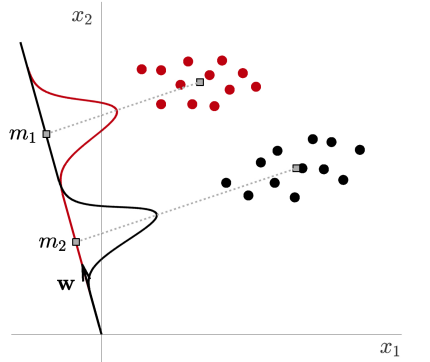


Se busca un vector de proyección óptimo donde los datos de una misma clase sean proyectados de manera compacta y al mismo tiempo que las medias proyectadas de ambas clases se encuentren lo más distante posible.

**Ejemplo para dos clases:**  


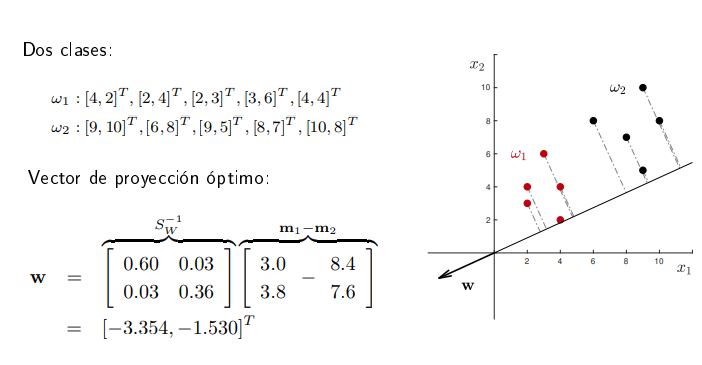



$m_{1,1} = \frac{4+2+2+3+6}{5} = 3$

$m_{1,2} = \frac{2+4+3+6+4}{5} = 3.8$



$m_{2,1} = \frac{9+6+9+8+10}{5} = 8.4$

$m_{2,2} = \frac{10+8+5+7+8}{5} = 7.6$

## **4.6 LDA para problemas de más de dos clases (multiclase)**

La generalización para $C$ clases involucra $C − 1$ funciones lineales
para realizar la proyección $\mathbb{R}^{d} \rightarrow \mathbb{R}^{C-1}$ asumiendo que $d \geq C-1$.



*   Generalización de la matriz de dispersión intra-clase es:
$$ S_W = \frac{1}{\sum\limits_{i=1}^{C} (N_i -1) }\sum_{i=1}^{C} (N_i-1)S_i$$

donde $S_i$ es la matriz de covarianza de la clase $C_i$.

*   Generalización de la matriz de dispersión inter-clase es:
$$S_B = \sum_{i=1}^{C} N_i (\mathbf{m}_i-\mathbf{m})(\mathbf{m}_i-\mathbf{m})^{\intercal}$$

donde $\mathbf{m} = \frac{1}{N} \sum\limits_{j=1}^{N}\mathbf{x}_j$ es el vector de medias total.



*   Generalización del criterio de Fisher

$$J(W) = \frac{W^{\intercal}S_B W}{W^{\intercal}S_W W} $$

donde $W = [\mathbf{w}_1,\ldots,\mathbf{w}_{C-1}]$ es una matriz de tamaño $d \times (C-1)$
*   Si $S_W$ es no singular, entonces $W$ se encuentra resolviendo el
problema de autovalores convencional:

$$ S_{B}\mathbf{w}_{i} = \lambda_{i} S_{W} \mathbf{w}_i, \quad i=1,\ldots, C-1$$
*   Proyección de un punto $\mathbf{x}\in \mathbb{R}^{d}$ a un espacio $\mathbb{R}^{C-1}$

$$\mathbf{z} = W^{\top}\mathbf{x}$$

donde $\mathbf{z}=[z_1,\ldots,z_{C-1}]^\top$


La matriz $W$ permite transformar los datos de un espacio $d$-dimensional a uno con $k$ características (siendo, generalmente, $k$=2). $\mathbf{X}$ es una matriz $N\times d$ dimensional que representa los $N$ datos de entrada y $\mathbf{z}$ son las muestras "transformadas" (con dimensión $N\times k$ en el nuevo subespacio).

$\underline{\text{Nota}}:$ el valor de $k$ es `n_components` en la función [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).


En el siguiente **ejemplo**, podéis ir visualizando cada una de estas matrices, así como los autovectores y autovalores y la representación de salida.

[Ejemplo paso por paso de LDA](https://sebastianraschka.com/Articles/2014_python_lda.html#principal-component-analysis-vs-linear-discriminant-analysis)


**Ejemplo: proyección de** $d=3$ **dimensiones a $k=2$**.



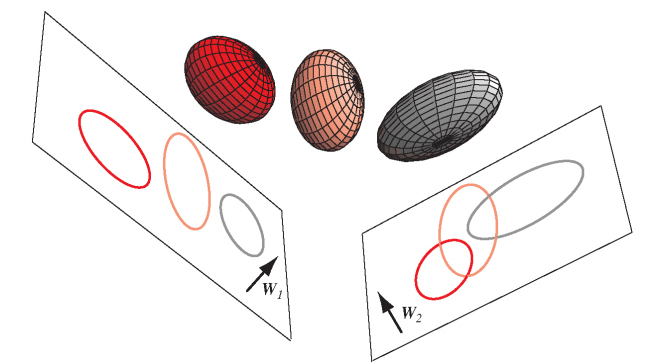

Dos distribuciones 3D con tres clases proyectadas sobre un espacio 2D, descrito por los vectores normales $W_1$ y $W_2$, donde $W_1$ obtiene la separación óptima entre las tres clases.


## **4.7 Análisis Discriminante Lineal (con `scikit-learn`)**

In [36]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [37]:
X,y= load_wine(return_X_y=True)

In [38]:
print('Número de observaciones:', X.shape[0])
print('Número de características ', X.shape[1])
print('Número de clases :', len(np.unique(y)))

Número de observaciones: 178
Número de características  13
Número de clases : 3


**LDA como clasificador**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [40]:
print('Número de muestras de entrenamiento =', X_train.shape[0])
print('Número de muestras de test =', X_test.shape[0])
print('Número de clases :', len(np.unique(y_test)))

Número de muestras de entrenamiento = 124
Número de muestras de test = 54
Número de clases : 3


In [41]:
scaler_LDA = StandardScaler()
scaler_LDA.fit(X_train)
X_train_s = scaler_LDA.transform(X_train)
X_test_s = scaler_LDA.transform(X_test)

In [42]:
print(X_train_s.shape)

(124, 13)


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_s,y_train)


LinearDiscriminantAnalysis()

In [44]:
score_LDA = lda_model.score(X_test_s,y_test)
score_LDA = np.round(score_LDA,2)
print('La probabilidad de acierto sobre el conjunto de test es:', score_LDA)

La probabilidad de acierto sobre el conjunto de test es: 1.0


LDA para reducción de la dimensionalidad

In [45]:
X_lda = lda_model.fit_transform(X,y)


La varianza correspondiente a cada componente, puede acceder a la siguiente propiedad:

In [46]:
lda_model.explained_variance_ratio_

array([0.68747889, 0.31252111])

¿Cuál era la varianza de cada una de las características de X?

In [47]:
print(np.std(X,0))

[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]


Las componentes LDA se muestran a continuación:

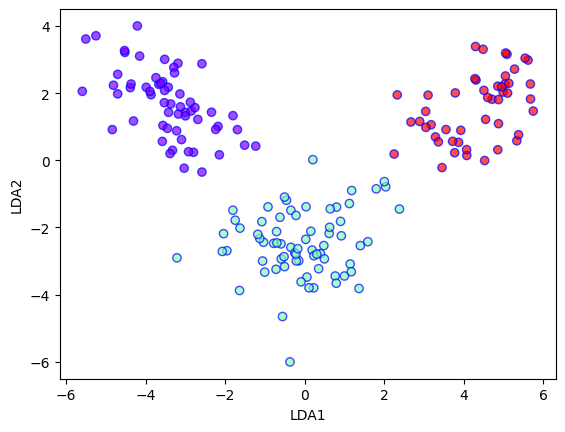

In [48]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.7,edgecolors='b')
plt.show()

**Si hubiéramos utilizado una única característica**...

(178, 2)


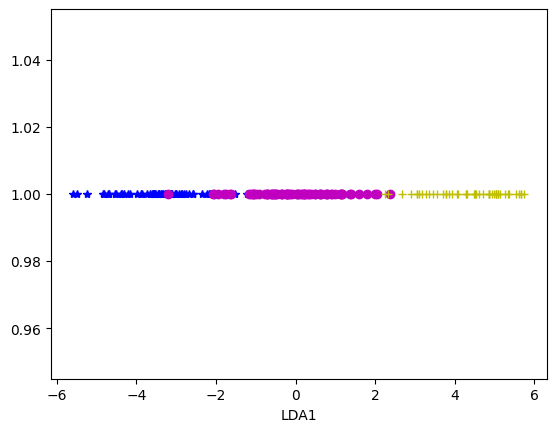

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_lda1 = lda.fit_transform(X,y)

print(X_lda.shape)
plt.xlabel('LDA1')
X_lda_clase_0 = X_lda1[y==0,0]
X_lda_clase_1 = X_lda1[y==1,0]
X_lda_clase_2 = X_lda1[y==2,0]

y0 = np.ones((X_lda_clase_0.shape[0],1))
y1 = np.ones((X_lda_clase_1.shape[0],1))
y2 = np.ones((X_lda_clase_2.shape[0],1))
plt.plot(X_lda_clase_0,y0,'*b')
plt.plot(X_lda_clase_1,y1,'om')
plt.plot(X_lda_clase_2,y2,'+y')
plt.show()